In [2]:
import pysptk
import parselmouth
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import seaborn as sns
import soundfile as sf

In [203]:
example_wav = "/data2/be_data/mnc/audio_16k/binbin/wav/scan0005.wav"
sound = parselmouth.Sound(example_wav)
x, fs = sf.read(example_wav)

In [204]:
from IPython.display import Audio
Audio(data=sound.values, rate=sound.sampling_frequency)

In [209]:
# pitch_praat = sound.to_pitch(pitch_floor=50, pitch_ceiling=500).selected_array['frequency']
pitch_rapt = pysptk.rapt((x*32768).astype(np.float32), fs=fs, hopsize=160, min=50, max=350, otype="f0")
pitch_swipe = pysptk.swipe(x.astype(np.float64), fs=fs, hopsize=160, min=50, max=350, otype="f0")

In [210]:
def plotOnGraph(pitch, color):
    pitch_values = pitch
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch_values, markersize=2.5, color=color, linewidth=3)
    
def setupGraph(ymin, ymax):
    sns.set() # Use seaborn's default style to make attractive graphs
    plt.rcParams['figure.dpi'] = 150 # Show images nicely
    plt.rcParams['figure.figsize'] = (16, 6)
    plt.figure()
    plt.ylim(ymin, ymax)
    plt.ylabel("frequency [Hz]")
    plt.xlabel("seconds")
    plt.grid(True)

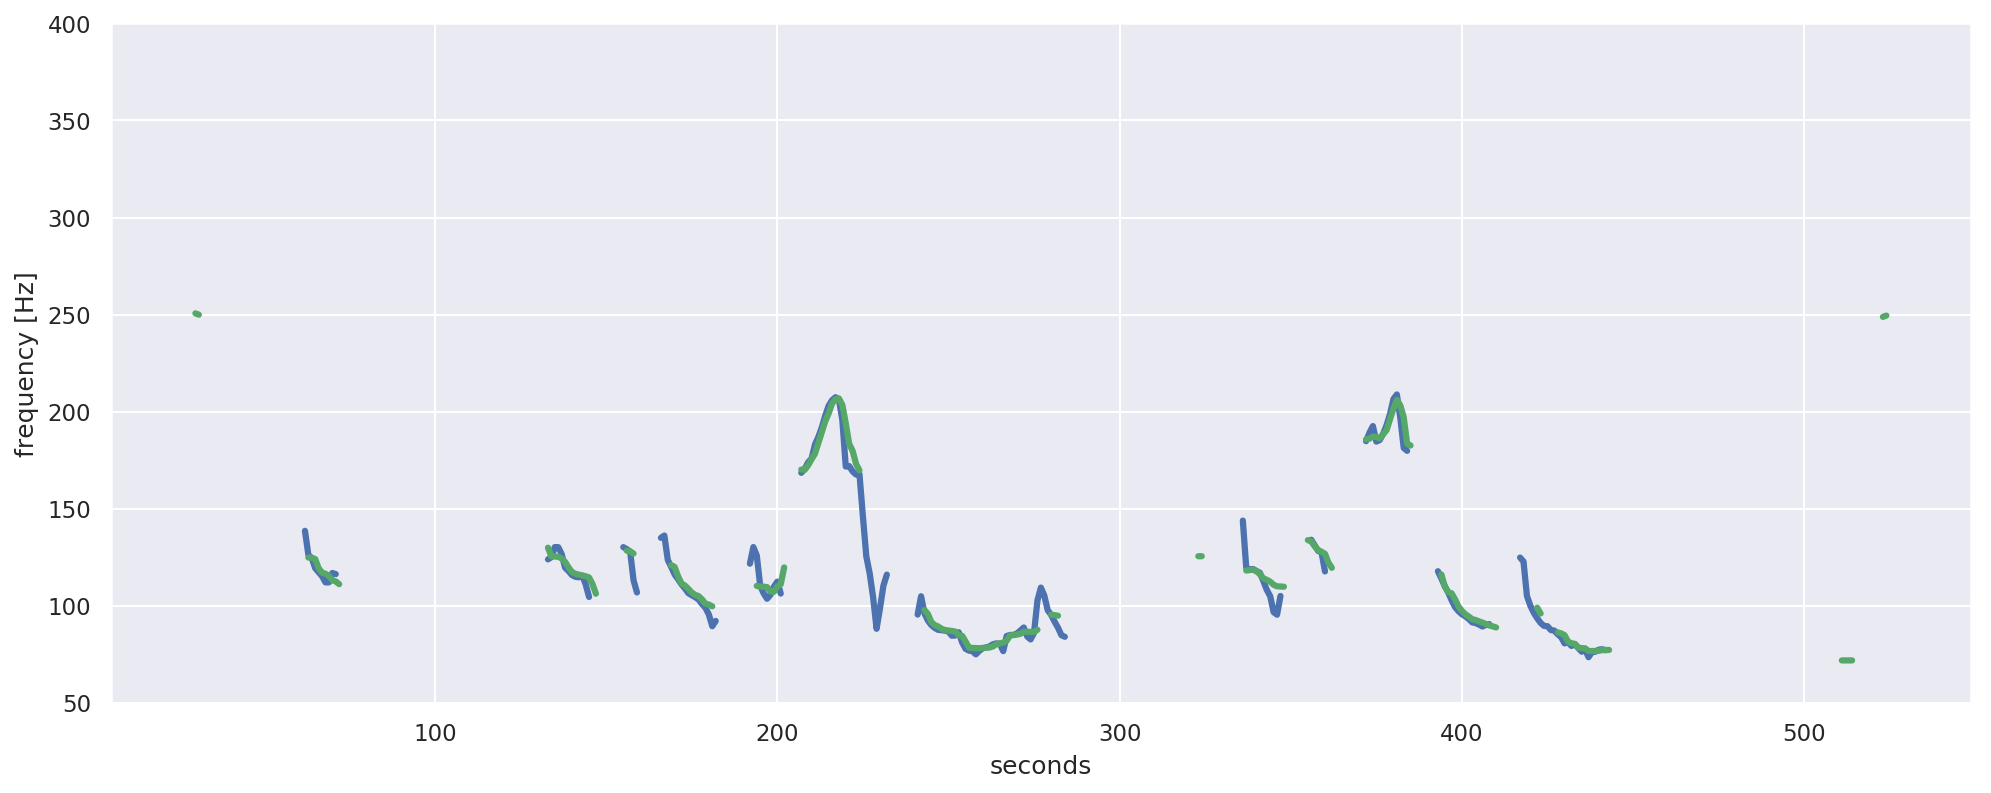

In [211]:
setupGraph(50, 400)
# plotOnGraph(pitch_praat, 'r')
plotOnGraph(pitch_rapt, 'b')
plotOnGraph(pitch_swipe, 'g')
plt.show()

In [185]:
np.expand_dims(pitch_rapt, axis=-1).shape

(530, 1)

In [176]:
import soundfile as sf
from scipy import signal
import librosa
def wav2mel(wav_file):
    wav, sr = sf.read(wav_file)
    wav = librosa.effects.preemphasis(wav, coef=0.98)
    mspec = librosa.feature.melspectrogram(y=wav, sr=sr, n_fft=320, hop_length=160, power=2.0, n_mels=80, fmax=8000)
    mspec = librosa.power_to_db(mspec, ref=np.max)
    return mspec

In [177]:
mel = wav2mel(example_wav)

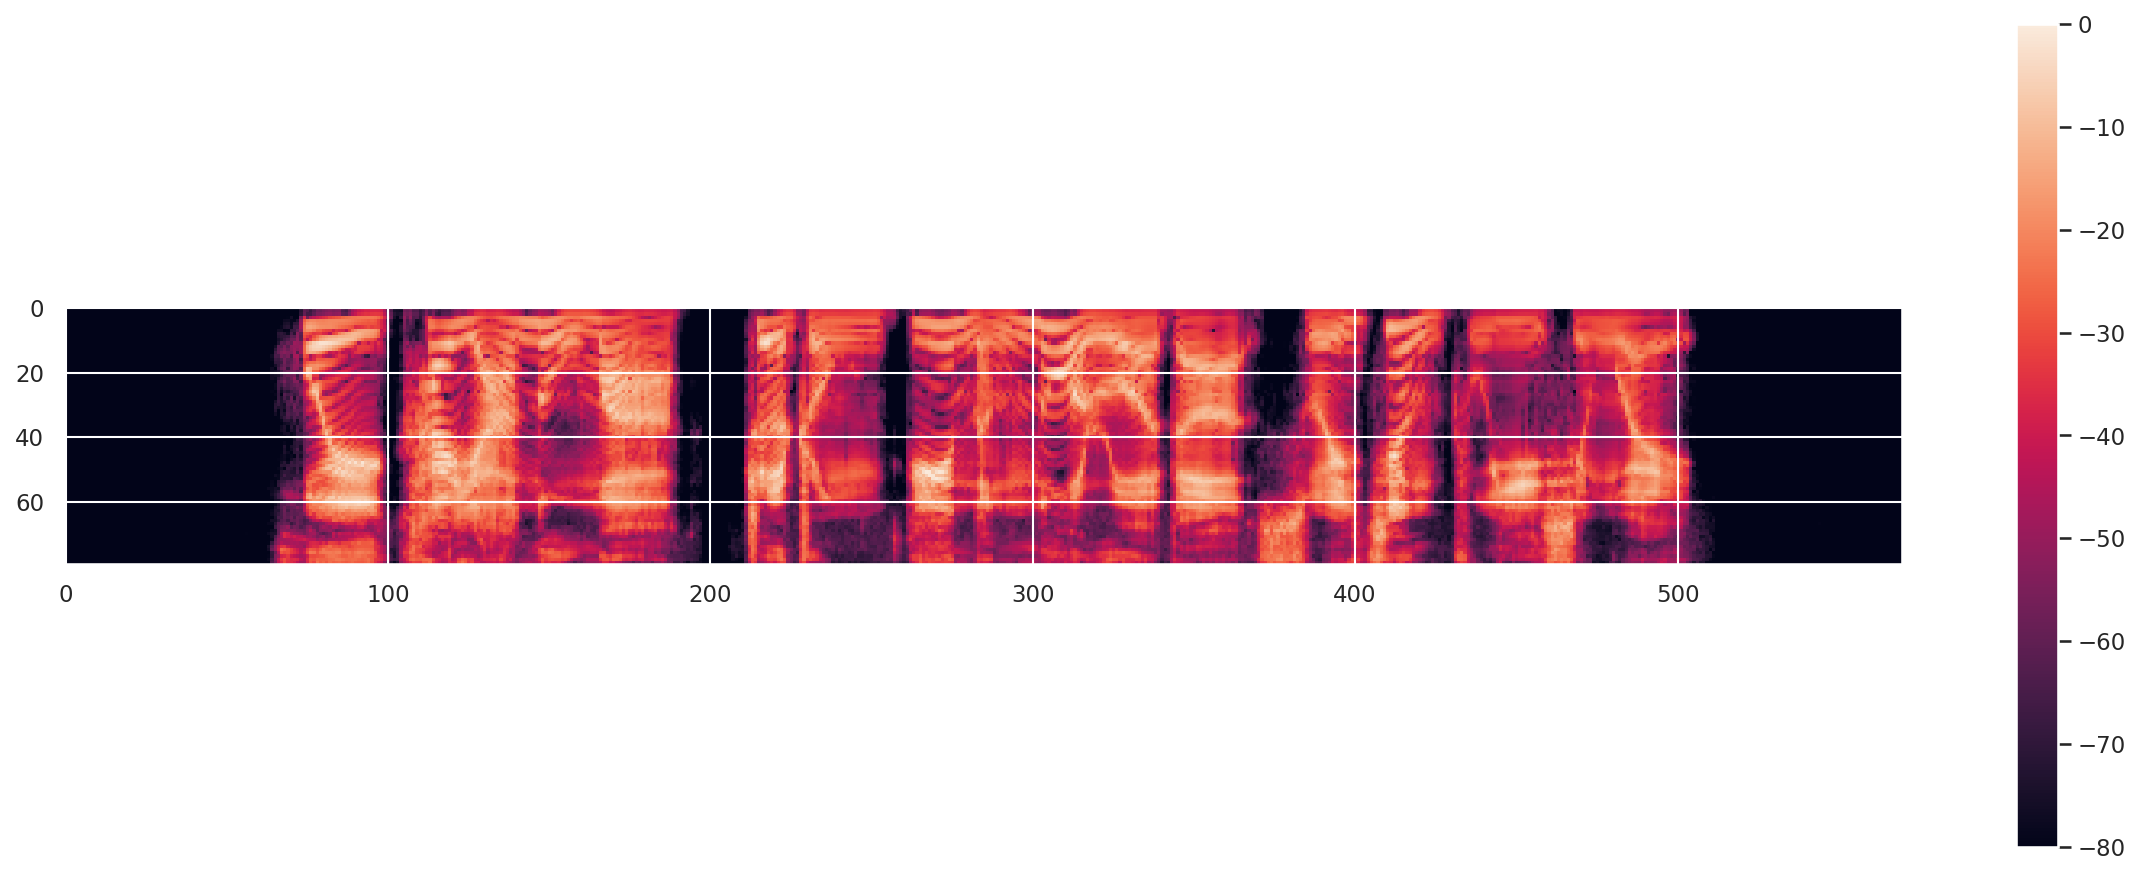

In [178]:
plt.imshow(mel)
plt.colorbar()
plt.tight_layout()

In [215]:
mel.T[:,-1].shape

(570,)

In [101]:
import librosa.display